In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

bc = sb.color_palette()[0]

import gmaps
import gmaps.datasets

gkey = %env GOOGLE_API_KEY
gmaps.configure(api_key=gkey)

In [2]:
df_2017 = pd.read_pickle('data/enhanced_data_2017.pkl.zip')
df_2018 = pd.read_pickle('data/enhanced_data_2018.pkl.zip')
df_2019 = pd.read_pickle('data/enhanced_data_2019.pkl.zip')

In [3]:
df = pd.concat([df_2017,df_2018,df_2019])
df['ride_year'] = df.ride_date.dt.year

# Trends in Bay Area Bike Sharing
## Overview
This is an analysis of data published by the Ford GoBike / Lyft Bay Wheels programs. Our main interest is to see how bike sharing is being used, and how that might be changing over time.

## Ride Statistics 2017-2019

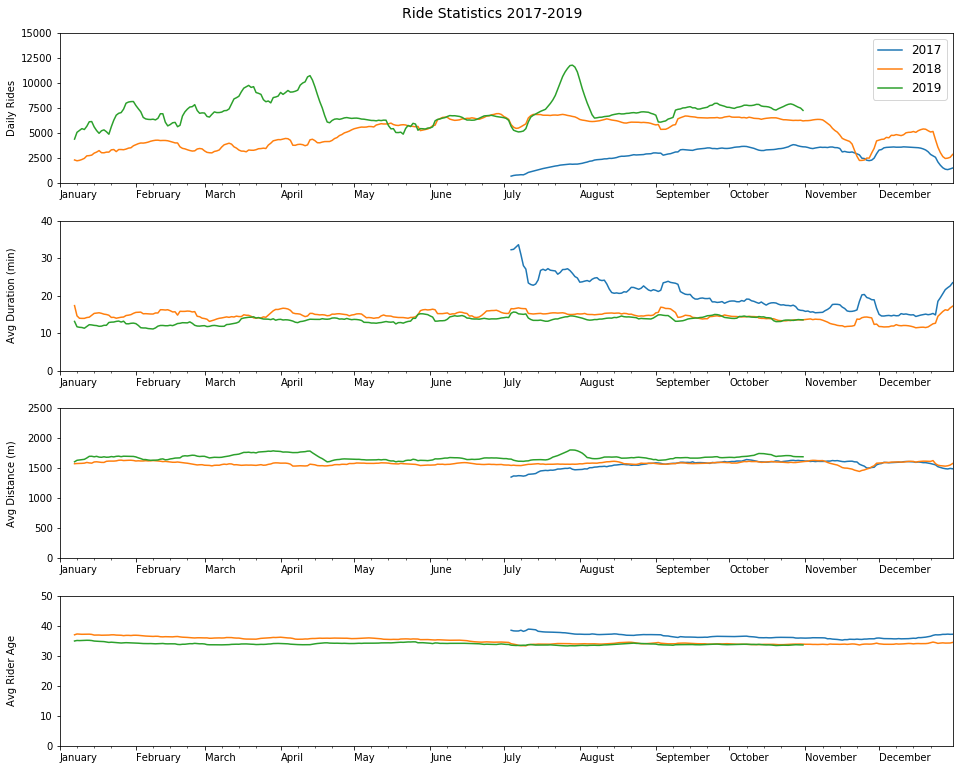

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(16,12))

for ax in axes:
    days = mdates.DayLocator(bymonthday=[8,15,22])
    months = mdates.MonthLocator()
    month_fmt = mdates.DateFormatter('%B')
    
    ax.set_xlim(1, 365)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.xaxis.set_minor_locator(days)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_horizontalalignment('left')

# Total Rides
axes[0].set_ylim(0, 15000)
axes[0].set_ylabel("Daily Rides")
axes[0].plot(df_2017.groupby(df_2017['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean())
axes[0].plot(df_2018.groupby(df_2018['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean())
axes[0].plot(df_2019.groupby(df_2019['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean())

# Ride Duration
axes[1].set_ylim(0, 40)
axes[1].set_ylabel("Avg Duration (min)")
axes[1].plot(df_2017.groupby(df_2017['ride_date'].dt.dayofyear)['duration_min'].mean().rolling(7).mean())
axes[1].plot(df_2018.groupby(df_2018['ride_date'].dt.dayofyear)['duration_min'].mean().rolling(7).mean())
axes[1].plot(df_2019.groupby(df_2019['ride_date'].dt.dayofyear)['duration_min'].mean().rolling(7).mean())

# Ride Distance
axes[2].set_ylim(0, 2500)
axes[2].set_ylabel("Avg Distance (m)")
axes[2].plot(df_2017.groupby(df_2017['ride_date'].dt.dayofyear)['trip_distance'].mean().rolling(7).mean())
axes[2].plot(df_2018.groupby(df_2018['ride_date'].dt.dayofyear)['trip_distance'].mean().rolling(7).mean())
axes[2].plot(df_2019.groupby(df_2019['ride_date'].dt.dayofyear)['trip_distance'].mean().rolling(7).mean())

# Rider Age
axes[3].set_ylim(0, 50)
axes[3].set_ylabel("Avg Rider Age")
axes[3].plot(df_2017.groupby(df_2017['ride_date'].dt.dayofyear)['member_age'].mean().rolling(7).mean())
axes[3].plot(df_2018.groupby(df_2018['ride_date'].dt.dayofyear)['member_age'].mean().rolling(7).mean())
axes[3].plot(df_2019.groupby(df_2019['ride_date'].dt.dayofyear)['member_age'].mean().rolling(7).mean())

axes[0].legend(['2017','2018','2019'], loc='upper right', prop={'size': 12})

fig.suptitle('Ride Statistics 2017-2019', fontsize=14)
fig.subplots_adjust(top=0.95)
fig.align_ylabels()
fig.subplots_adjust(hspace=0.25);

The number of daily rides has been steadily increasing since the program's initial rollout. But while the number of rides has increased, the kinds of rides being taken have stayed the same. We see little change in average distance, duration, and age of rider.

## Rider Demographics
To gain some insight into why ridership might be so homogenous, we'll take a closer look at some demographic data.

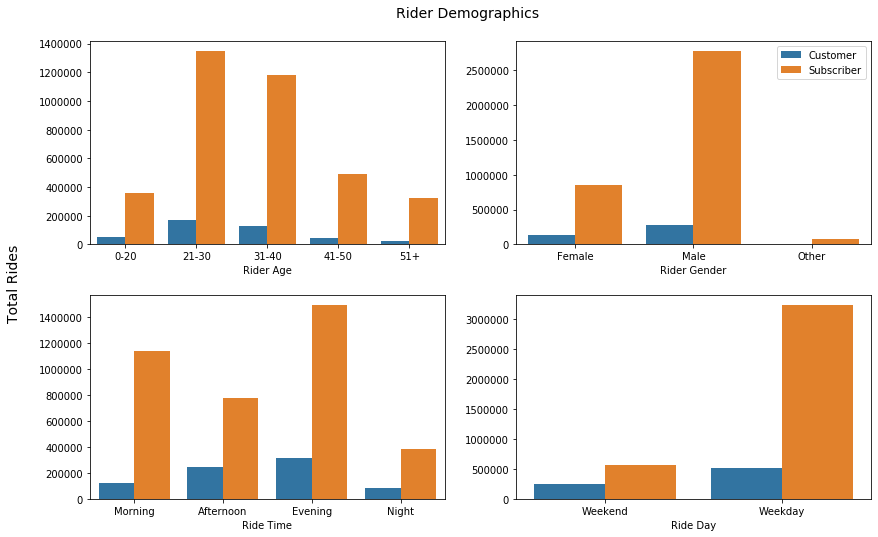

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

sb.countplot(data=df, ax=axes[0,0], x='age_group', hue='user_type')
sb.countplot(data=df, ax=axes[0,1], x='member_gender', hue='user_type')
sb.countplot(data=df, ax=axes[1,0], x='ride_period', hue='user_type',
             order=['Morning', 'Afternoon', 'Evening', 'Night'])
sb.countplot(data=df, ax=axes[1,1], x='weekday_ride', hue='user_type')

axes[0,0].set_xlabel("Rider Age")
axes[0,0].set_ylabel("")
axes[0,0].legend_.remove()

axes[0,1].set_xlabel("Rider Gender")
axes[0,1].set_ylabel("")
handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles=handles, labels=labels)

axes[1,0].legend_.remove()
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("Ride Time")

axes[1,1].legend_.remove()
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("Ride Day")
axes[1,1].set_xticklabels(['Weekend', 'Weekday'])

fig.suptitle('Rider Demographics', fontsize=14)
fig.subplots_adjust(top=0.92)
fig.text(0.05,0.5, "Total Rides", ha="center", va="center", rotation=90, fontsize=14)
fig.subplots_adjust(hspace=0.25);

It appears that the bike share is being used in a very specific way, by certain groups of people. Ridership is primarily young and male, with most rides occurring during the morning and evening work commutes. Most of the rides are taken by regular subscribers, rather than 1-off customers.

## Trends in Subscribership

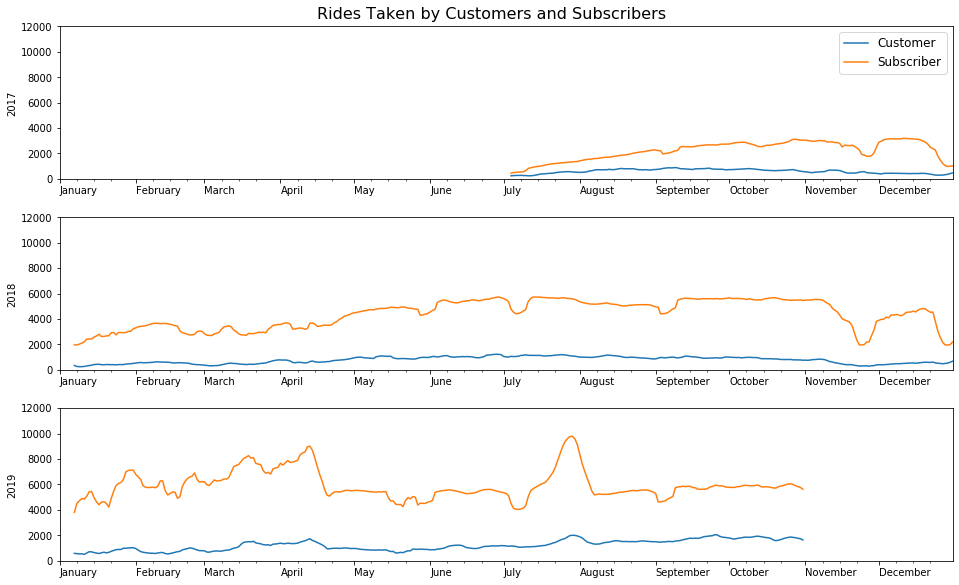

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(16,9))

for ax in axes:
    days = mdates.DayLocator(bymonthday=[8,15,22])
    months = mdates.MonthLocator()
    month_fmt = mdates.DateFormatter('%B')
    
    ax.set_xlim(1, 365)
    ax.set_ylim(0, 12000)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.xaxis.set_minor_locator(days)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_horizontalalignment('left')


axes[0].set_ylabel("2017")
axes[0].plot(df_2017[df_2017.user_type == 'Customer'].groupby(df_2017['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());
axes[0].plot(df_2017[df_2017.user_type == 'Subscriber'].groupby(df_2017['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());

axes[1].set_ylabel("2018")
axes[1].plot(df_2018[df_2018.user_type == 'Customer'].groupby(df_2018['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());
axes[1].plot(df_2018[df_2018.user_type == 'Subscriber'].groupby(df_2018['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());

axes[2].set_ylabel("2019")
axes[2].plot(df_2019[df_2019.user_type == 'Customer'].groupby(df_2019['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());
axes[2].plot(df_2019[df_2019.user_type == 'Subscriber'].groupby(df_2019['ride_date'].dt.dayofyear)['start_station_latitude'].count().rolling(7).mean());

axes[0].legend(['Customer', 'Subscriber'], loc='upper right', prop={'size': 12})

fig.suptitle('Rides Taken by Customers and Subscribers', fontsize=16)
fig.subplots_adjust(top=0.95)
fig.align_ylabels()
fig.subplots_adjust(hspace=0.25);

We see that most of the growth in ridership is attributed to growth in use by subscribers. The number of rides taken by casual customers has remained mostly flat since program rollout. This dominance by subscribers might explain why usage statistics look so similar over the past 2.5 years.

In [7]:
df['lat'] = df.start_station_latitude.round(3)
df['lon'] = df.start_station_longitude.round(3)
geo_combined = pd.DataFrame({'rides': df[
    (df.lon > -122.5) &  (df.lon < -122.15) &
     (df.lat > 37.7) &  (df.lat < 38) ].groupby(['lat','lon']).size()}).reset_index()
fig = gmaps.figure(layout={'width': '1000px', 'height': '500px'})
fig.add_layer(gmaps.heatmap_layer(geo_combined[['lat','lon']],
                                  weights=geo_combined.rides))
fig

Figure(layout=FigureLayout(height='500px', width='1000px'))

## Rides by Location
Overlaying ride counts on a city map, we see further homogeneity. Most rides are being taken in a very limited area of downtown San Francisco.
![Bay Area Rides](img/map_cropped.png)